# Blob detection for facial emotion recognition

## Facial emotion recognition
In this task we chose the facial-expression dataset, because it can clearly visualize how blobdetection can be used to recognize different emotions. 

In [6]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2 as cv2
# sample_hitch = imread('vehicles/hatchback/PIC_100.jpg')
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Load the image (replace 'path_to_your_image.jpg' with your image path)
# image = cv2.imread('facial-emotion-recognition/7/Sad.jpg')
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for face detection

# # Detect faces in the image
# faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# # If at least one face is found, crop the image
# if len(faces) > 0:
#     for (x, y, w, h) in faces:
#         # Crop the image to the face area
#         face_image = image[y:y+h, x:x+w]
        
#         # Display the cropped face
#         plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
#         plt.title("Cropped Face")
#         plt.axis('off')
#         plt.show()
# else:
#     print("No face detected!")

import cv2
import numpy as np;
 
# Read image

Blob detection can be broken into four steps:
- Thresholding 
- Grouping 
- Merging
- Center
  

## Thresholding 
For thresholding, we first need to break the images down to binary, and we do this by using different thresholds. We start here with a minThreshold of 10 as a base.

In [8]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 300;

params.filterByColor = True
params.blobColor = 0
# Filter by Area.
params.filterByArea = True
params.minArea = 40
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)

In [9]:
im = cv2.imread("vehicles/motorcycle/PIC_158.jpg", cv2.IMREAD_GRAYSCALE)
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [1]:
# sample_emotion_binaries = []
# for i in range(6):
#     sample_emotion_binaries.append( > (0.2 + 0.1 * i))

# fig, ax = plt.subplots(2,6,figsize=(20,10))
# for i in range(6):
#     ax[0,i].imshow(sample_emotion_binaries[i],cmap='gray')
#     ax[0,i].set_title('Threshold: ' + (str(round((0.2 + 0.1 * i)*10)/10)),fontsize=15)
#     ax[1,i].plot(sample_g_emotion[100])
#     ax[1,i].set_ylabel('Pixel Value')
#     ax[1,i].set_xlabel('Width of Picture')
#     ax[1,i].set_title('Plot of 1 Line',fontsize=15)
# ax[0,0].set_title('Grayscale Image',fontsize=20)
# ax[0,0].imshow(sample_g_hitch,cmap='gray')
# ax[0,1].plot(sample_g_hitch[100])
# ax[0,1].set_ylabel('Pixel Value')
# ax[0,1].set_xlabel('Width of Picture')
# ax[0,1].set_title('Plot of 1 Line',fontsize=15)
# ax[0,2].set_title('Binarized Image',fontsize=15)
# ax[0,2].imshow(sample_b_hitch,cmap='gray')

# ax[1,0].set_title('Grayscale Image',fontsize=20)
# ax[1,0].imshow(sample_g_motorcycle,cmap='gray')
# ax[1,1].plot(sample_g_motorcycle[100])
# ax[1,1].set_ylabel('Pixel Value')
# ax[1,1].set_xlabel('Width of Picture')
# ax[1,1].set_title('Plot of 1 Line',fontsize=15)
# ax[1,2].set_title('Binarized Image',fontsize=15)
# ax[1,2].imshow(sample_b_motorcycle,cmap='gray')


In [82]:
from skimage.feature import blob_dog, blob_log, blob_doh

When grouping merging and centering we can use scimages built in blob detection function. We first look at one image to test what threshold and other values yields the best results. 

In [3]:
# from skimage.feature import blob_dog, blob_log, blob_doh
# sigma_values = [20,30,40,50,60,70]
# num_images = len(sample_emotion_binaries)
# fig, axes = plt.subplots(num_images, len(sigma_values), figsize=(15, 3 * num_images))

# # Loop over each binary image
# for img_index, binary_image in enumerate(sample_emotion_binaries):
#     # Loop over different sigma values and plot the blobs for each binary image
#     for sigma_index, max_sigma in enumerate(sigma_values):
#         # Detect blobs using the LoG algorithm for current max_sigma
#         blobs = blob_log(np.invert(binary_image), min_sigma=10, max_sigma=max_sigma, threshold=0.02)

#         # Plot the image
#         axes[img_index, sigma_index].imshow(sample_emotion, cmap='gray')
#         axes[img_index, sigma_index].set_title(f'Image {img_index + 1}, max_sigma={max_sigma}')

#         # Draw the detected blobs
#         for blob in blobs:
#             y, x, radius = blob
#             radius = radius * np.sqrt(2)  # Adjust radius for correct scale
#             axes[img_index, sigma_index].add_patch(plt.Circle((x, y), radius, color='r', fill=False))

#         axes[img_index, sigma_index].axis('off')  # Hide axes for better visualization

# # Adjust layout
# plt.tight_layout()
# plt.show()

Number of blobs detected: 22


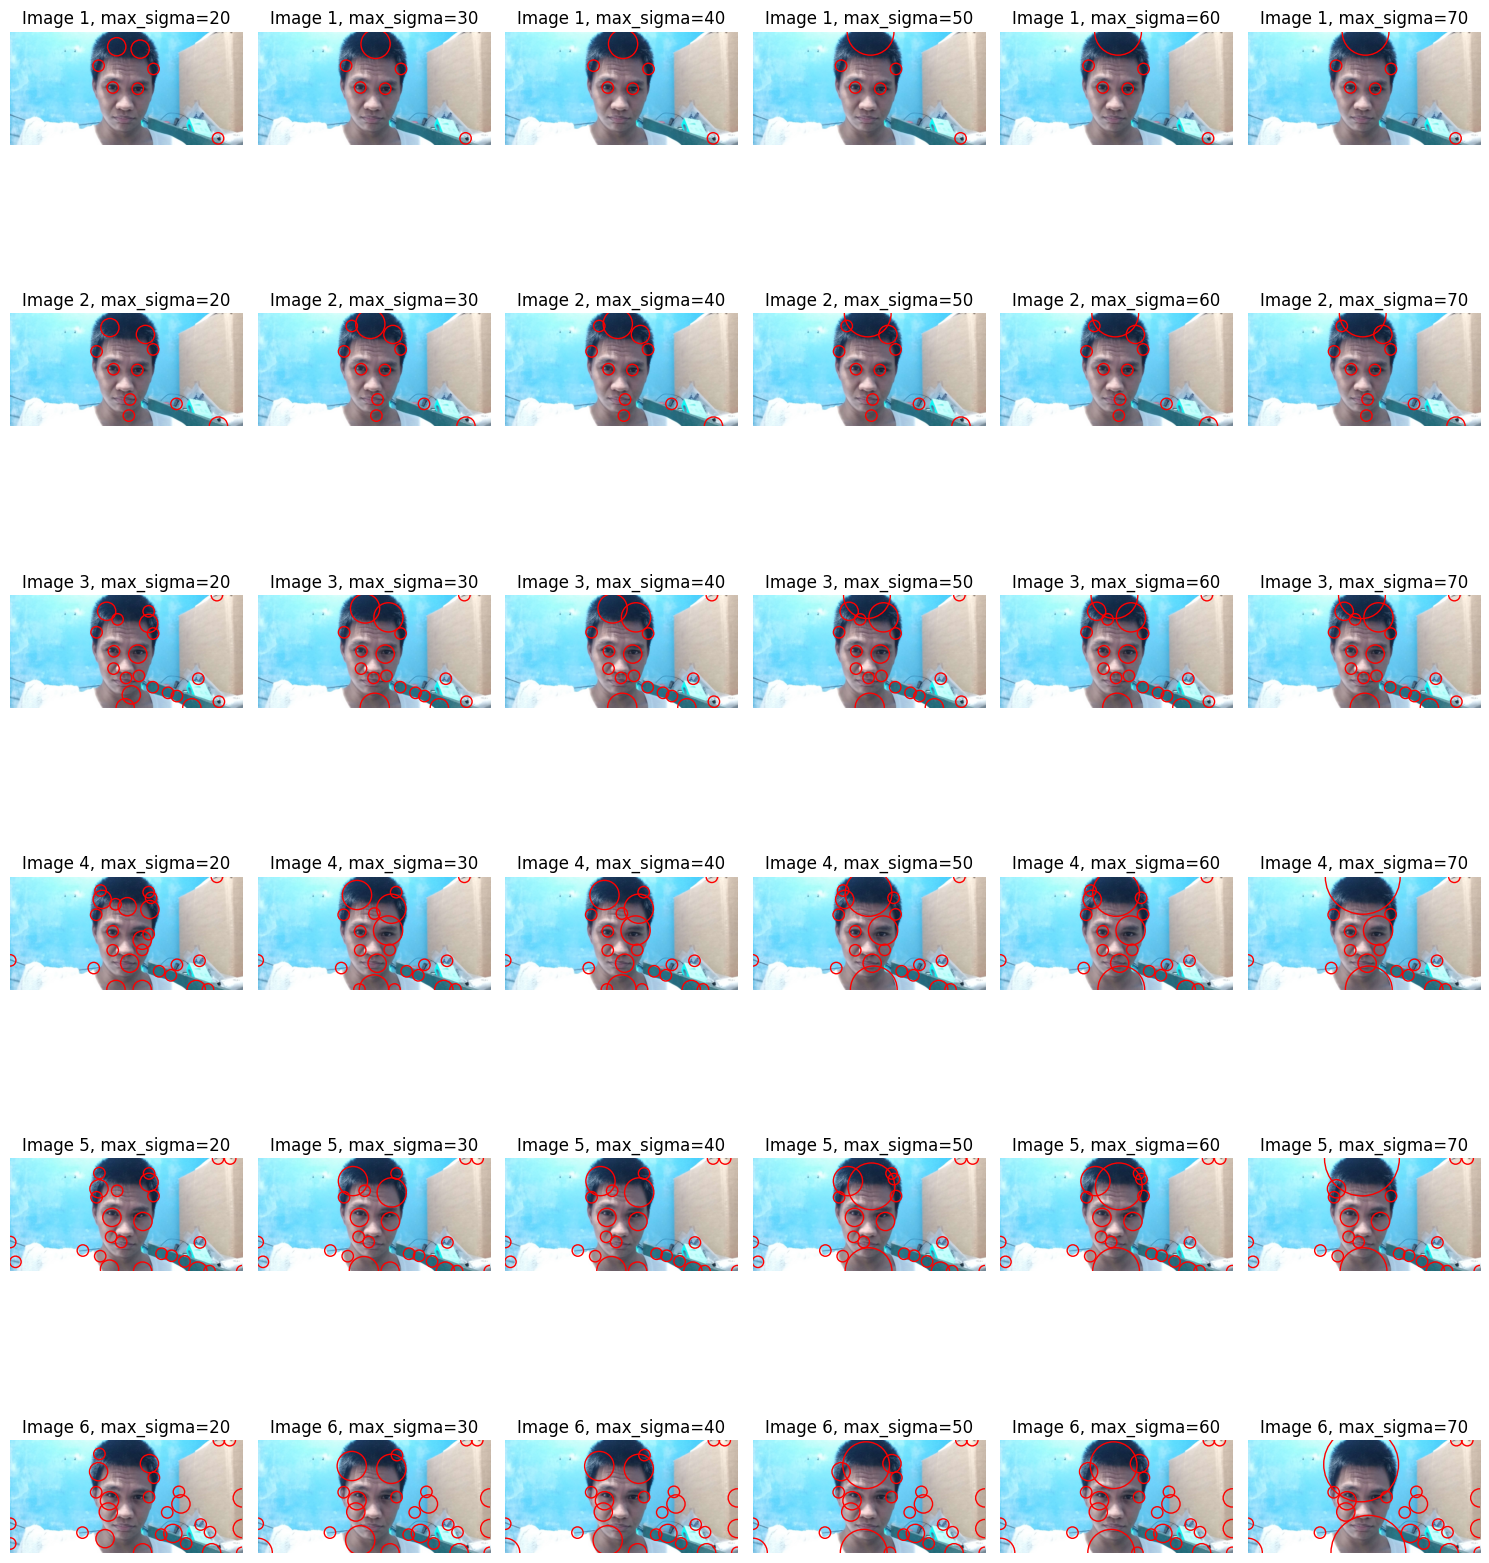

In [21]:
# from skimage.feature import blob_dog, blob_log, blob_doh
# sigma_values = [20,30,40,50,60,70]
# num_images = len(sample_emotion_binaries)
# fig, axes = plt.subplots(num_images, len(sigma_values), figsize=(15, 3 * num_images))

# # Loop over each binary image
# for img_index, binary_image in enumerate(sample_emotion_binaries):
#     # Loop over different sigma values and plot the blobs for each binary image
#     for sigma_index, max_sigma in enumerate(sigma_values):
#         # Detect blobs using the LoG algorithm for current max_sigma
#         blobs = blob_dog(np.invert(binary_image), min_sigma=10, max_sigma=max_sigma, threshold=0.02)

#         # Plot the image
#         axes[img_index, sigma_index].imshow(sample_emotion, cmap='gray')
#         axes[img_index, sigma_index].set_title(f'Image {img_index + 1}, max_sigma={max_sigma}')

#         # Draw the detected blobs
      
#         for blob in blobs:
#             y, x, radius = blob
#             radius = radius * np.sqrt(2)  # Adjust radius for correct scale
#             axes[img_index, sigma_index].add_patch(plt.Circle((x, y), radius, color='r', fill=False))

#         axes[img_index, sigma_index].axis('off')  # Hide axes for better visualization
# print(f'Number of blobs detected: {len(blobs)}')

# # Adjust layout
# plt.tight_layout()
# plt.show()

Number of blobs detected: 10


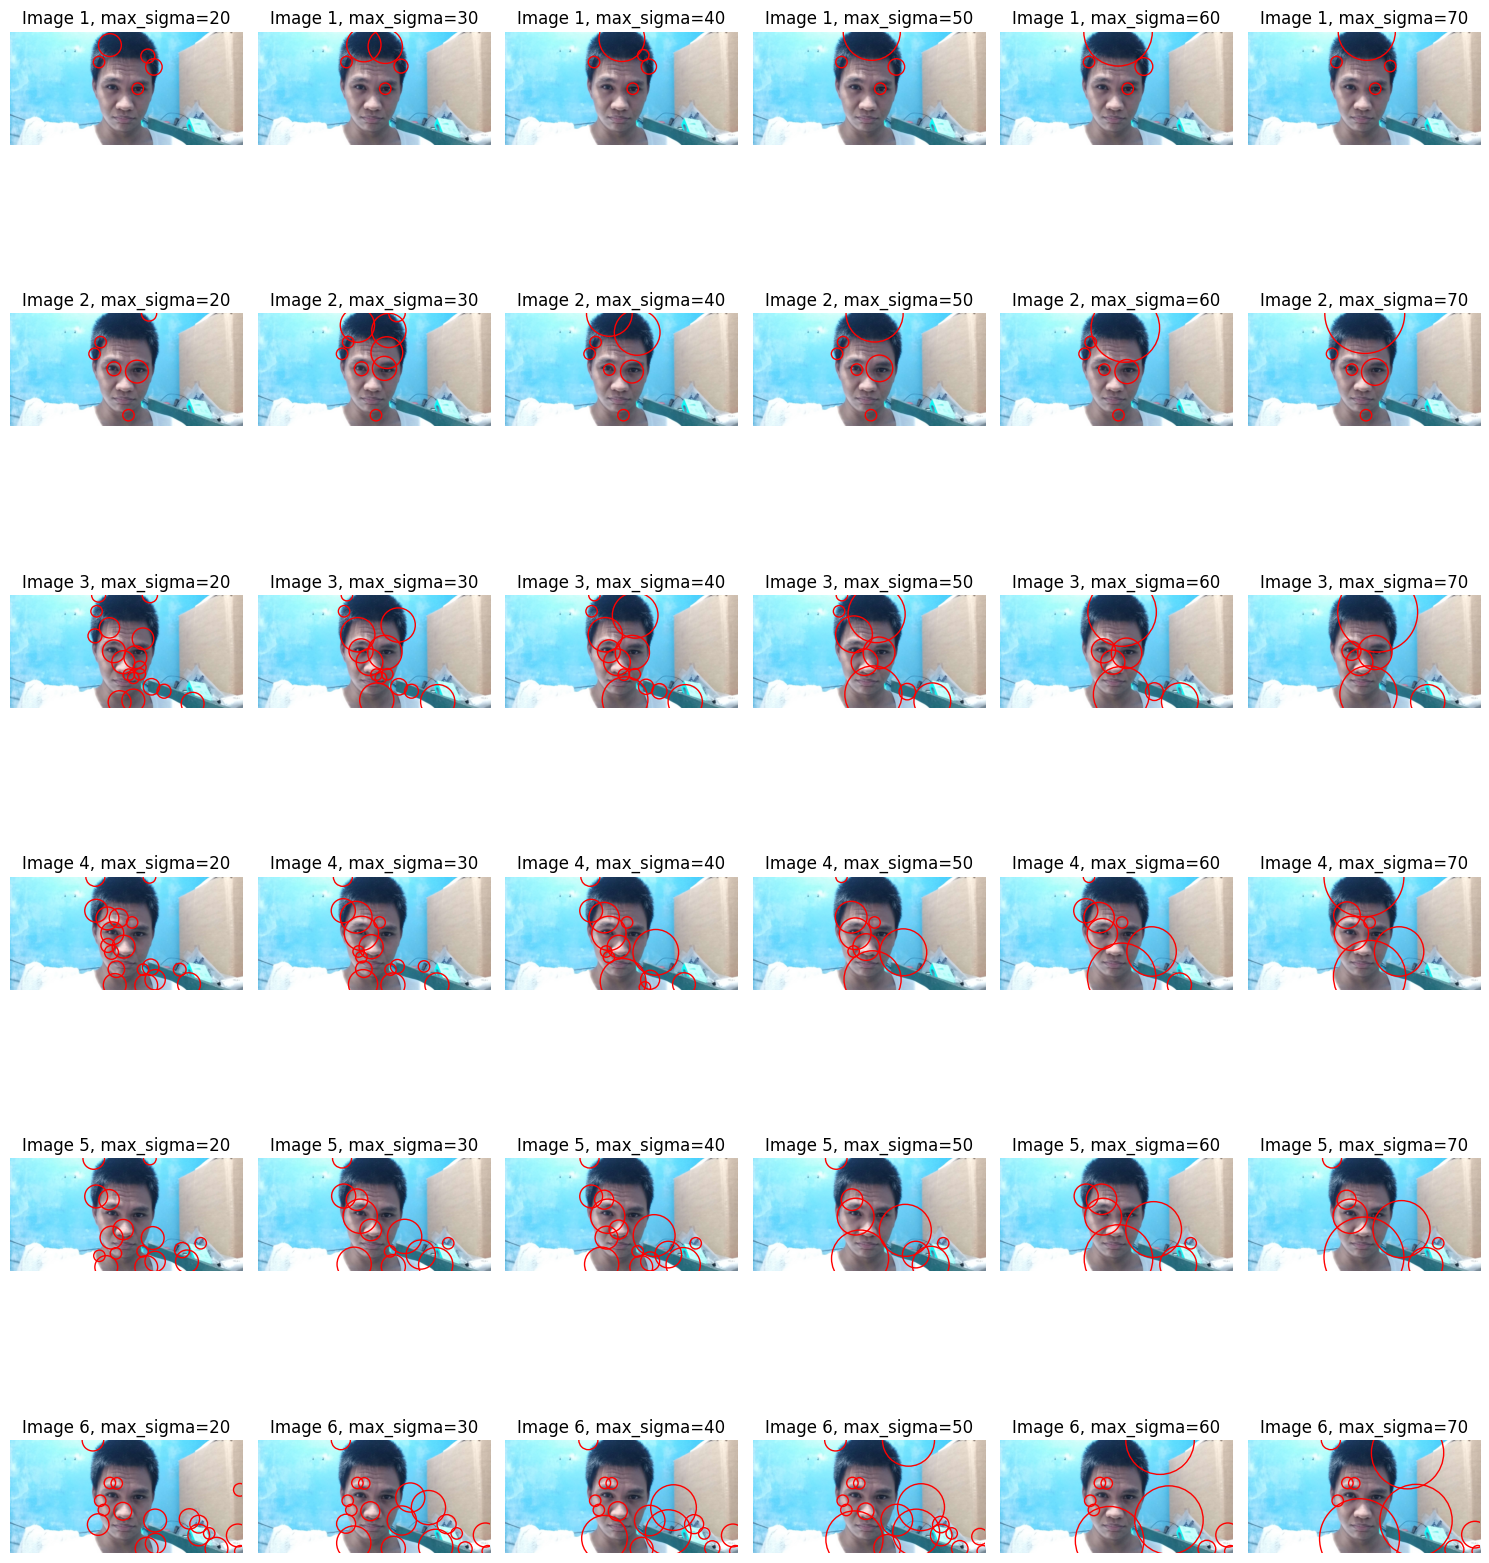

In [20]:
# from skimage.feature import blob_dog, blob_log, blob_doh
# sigma_values = [20,30,40,50,60,70]
# num_images = len(sample_emotion_binaries)
# fig, axes = plt.subplots(num_images, len(sigma_values), figsize=(15, 3 * num_images))

# # Loop over each binary image
# for img_index, binary_image in enumerate(sample_emotion_binaries):
#     # Loop over different sigma values and plot the blobs for each binary image
#     for sigma_index, max_sigma in enumerate(sigma_values):
#         # Detect blobs using the LoG algorithm for current max_sigma
#         blobs = blob_doh(np.invert(binary_image), min_sigma=10, max_sigma=max_sigma, threshold=0.02)

#         # Plot the image
#         axes[img_index, sigma_index].imshow(sample_emotion, cmap='gray')
#         axes[img_index, sigma_index].set_title(f'Image {img_index + 1}, max_sigma={max_sigma}')

#         # Draw the detected blobs
      
#         for blob in blobs:
#             y, x, radius = blob
#             radius = radius * np.sqrt(2)  # Adjust radius for correct scale
#             axes[img_index, sigma_index].add_patch(plt.Circle((x, y), radius, color='r', fill=False))

#         axes[img_index, sigma_index].axis('off')  # Hide axes for better visualization
# print(f'Number of blobs detected: {len(blobs)}')

# # Adjust layout
# plt.tight_layout()
# plt.show()